<a href="https://colab.research.google.com/github/Manoj2k27/testing/blob/main/FIND_S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Finds

In [ ]:
import pandas as pd
import numpy as np

#to read the data in the csv file
data = pd.read_csv("/DATA3.csv")
print(data,"n")

#making an array of all the attributes
d = np.array(data)[:,:-1]
print("n The attributes are: ",d)

#segragating the target that has positive and negative examples
target = np.array(data)[:,-1]
print("n The target is: ",target)

#training function to implement find-s algorithm
def train(c,t):
    for i, val in enumerate(t):
        if val == "Yes":
            specific_hypothesis = c[i].copy()
            break

    for i, val in enumerate(c):
        if t[i] == "Yes":
            for x in range(len(specific_hypothesis)):
                if val[x] != specific_hypothesis[x]:
                    specific_hypothesis[x] = '?'
                else:
                    pass

    return specific_hypothesis

#obtaining the final hypothesis
print("n The final hypothesis is:",train(d,target))

      Time Weather Tempeartue Company Humidity    Wind Goes
0  Morning   Sunny       Warm     Yes      Mid  Strong  Yes
1  Evening   Rainy       Cold      No      Mid  Normal   No
2  Morning   Sunny   Moderate     Yes   Normal  Normal  Yes
3  Evening   Sunny       Cold     Yes     High  Strong  Yes n
n The attributes are:  [['Morning' 'Sunny' 'Warm' 'Yes' 'Mid' 'Strong']
 ['Evening' 'Rainy' 'Cold' 'No' 'Mid' 'Normal']
 ['Morning' 'Sunny' 'Moderate' 'Yes' 'Normal' 'Normal']
 ['Evening' 'Sunny' 'Cold' 'Yes' 'High' 'Strong']]
n The target is:  ['Yes' 'No' 'Yes' 'Yes']
n The final hypothesis is: ['?' 'Sunny' '?' 'Yes' '?' '?']


In [ ]:
# import the packages
import numpy as np
import pandas as pd
# Loading Data from a CSV File
data=pd.DataFrame(data=pd.read_csv("/Book1.csv"))
print(data)
# Separating concept features from Target
concepts = np.array(data.iloc[:,0:-1])
print(concepts)
# Isolating target into a separate DataFrame
# copying last column to target array
target = np.array(data.iloc[:,-1])
print(target)
def learn(concepts, target):
    '''
    learn() function implements the learning method of the Candidate elimination algorithm.
    Arguments:
        concepts - a data frame with all the features
        target - a data frame with corresponding output values
    '''
    # Initialise S0 with the first instance from concepts
    # .copy() makes sure a new list is created instead of just pointing
    # to the same memory location
    specific_h = concepts[0].copy()
    print("\nInitialization of specific_h and general_h")
    print(specific_h)
    general_h = [["?" for i in range(len(specific_h))] for i in range(len(specific_h))]
    print(general_h)
    # The learning iterations
    for i, h in enumerate(concepts):
        # Checking if the hypothesis has a positive target
        if target[i] == "Yes":
            for x in range(len(specific_h)):
                # Change values in S & G only if values change
                if h[x] != specific_h[x]:
                    specific_h[x] = '?'
                    general_h[x][x] = '?'
        # Checking if the hypothesis has a positive target
        if target[i] == "No":
            for x in range(len(specific_h)):
                # For negative hyposthesis change values only  in G
                if h[x] != specific_h[x]:
                    general_h[x][x] = specific_h[x]
                else:
                    general_h[x][x] = '?'
        print("\nSteps of Candidate Elimination Algorithm",i+1)
        print(specific_h)
        print(general_h)
    # find indices where we have empty rows, meaning those that are unchanged
    indices = [i for i, val in enumerate(general_h) if val == ['?', '?', '?', '?', '?', '?']]
    for i in indices:
        # remove those rows from general_h
        general_h.remove(['?', '?', '?', '?', '?', '?'])
    # Return final values
    return specific_h, general_h
s_final, g_final = learn(concepts, target)
print("\nFinal Specific_h:", s_final, sep="\n")
print("\nFinal General_h:", g_final, sep="\n")

    Size Color     Shape Class
0    Big   Red    Circle    No
1  Small   Red  Triangle    No
2  Small   Red    Circle   Yes
3    Big  Blue    Circle    No
4  Small  Blue    Circle   Yes
[['Big' 'Red' 'Circle']
 ['Small' 'Red' 'Triangle']
 ['Small' 'Red' 'Circle']
 ['Big' 'Blue' 'Circle']
 ['Small' 'Blue' 'Circle']]
['No' 'No' 'Yes' 'No' 'Yes']

Initialization of specific_h and general_h
['Big' 'Red' 'Circle']
[['?', '?', '?'], ['?', '?', '?'], ['?', '?', '?']]

Steps of Candidate Elimination Algorithm 1
['Big' 'Red' 'Circle']
[['?', '?', '?'], ['?', '?', '?'], ['?', '?', '?']]

Steps of Candidate Elimination Algorithm 2
['Big' 'Red' 'Circle']
[['Big', '?', '?'], ['?', '?', '?'], ['?', '?', 'Circle']]

Steps of Candidate Elimination Algorithm 3
['?' 'Red' 'Circle']
[['?', '?', '?'], ['?', '?', '?'], ['?', '?', 'Circle']]

Steps of Candidate Elimination Algorithm 4
['?' 'Red' 'Circle']
[['?', '?', '?'], ['?', 'Red', '?'], ['?', '?', '?']]

Steps of Candidate Elimination Algorithm 5
['?' 

In [ ]:
import numpy as np
import math
import csv

def read_data(filename):
    with open(filename, 'r') as csvfile:
        datareader = csv.reader(csvfile, delimiter=',')
        headers = next(datareader)
        metadata = []
        traindata = []
        for name in headers:
            metadata.append(name)
        for row in datareader:
            traindata.append(row)

    return (metadata, traindata)

class Node:
    def __init__(self, attribute):
        self.attribute = attribute
        self.children = []
        self.answer = ""

    def __str__(self):
        return self.attribute

def subtables(data, col, delete):
    dict = {}
    items = np.unique(data[:, col])
    count = np.zeros((items.shape[0], 1), dtype=np.int32)

    for x in range(items.shape[0]):
        for y in range(data.shape[0]):
            if data[y, col] == items[x]:
                count[x] += 1

    for x in range(items.shape[0]):
        dict[items[x]] = np.empty((int(count[x]), data.shape[1]), dtype="|S32")
        pos = 0
        for y in range(data.shape[0]):
            if data[y, col] == items[x]:
                dict[items[x]][pos] = data[y]
                pos += 1
        if delete:
            dict[items[x]] = np.delete(dict[items[x]], col, 1)

    return items, dict

def entropy(S):
    items = np.unique(S)

    if items.size == 1:
        return 0

    counts = np.zeros((items.shape[0], 1))
    sums = 0

    for x in range(items.shape[0]):
        counts[x] = sum(S == items[x]) / (S.size * 1.0)

    for count in counts:
        sums += -1 * count * math.log(count, 2)
    return sums

def gain_ratio(data, col):
    items, dict = subtables(data, col, delete=False)

    total_size = data.shape[0]
    entropies = np.zeros((items.shape[0], 1))
    intrinsic = np.zeros((items.shape[0], 1))

    for x in range(items.shape[0]):
        ratio = dict[items[x]].shape[0]/(total_size * 1.0)
        entropies[x] = ratio * entropy(dict[items[x]][:, -1])
        intrinsic[x] = ratio * math.log(ratio, 2)

    total_entropy = entropy(data[:, -1])
    iv = -1 * sum(intrinsic)

    for x in range(entropies.shape[0]):
        total_entropy -= entropies[x]

    return total_entropy / iv

def create_node(data, metadata):
    if (np.unique(data[:, -1])).shape[0] == 1:
        node = Node("")
        node.answer = np.unique(data[:, -1])[0]
        return node

    gains = np.zeros((data.shape[1] - 1, 1))

    for col in range(data.shape[1] - 1):
        gains[col] = gain_ratio(data, col)

    split = np.argmax(gains)

    node = Node(metadata[split])
    metadata = np.delete(metadata, split, 0)

    items, dict = subtables(data, split, delete=True)

    for x in range(items.shape[0]):
        child = create_node(dict[items[x]], metadata)
        node.children.append((items[x], child))

    return node

def empty(size):
    s = ""
    for x in range(size):
        s += "   "
    return s

def print_tree(node, level):
    if node.answer != "":
        print(empty(level), node.answer)
        return
    print(empty(level), node.attribute)
    for value, n in node.children:
        print(empty(level + 1), value)
        print_tree(n, level + 2)

metadata, traindata = read_data("/ID3DATASET.csv")
data = np.array(traindata)
node = create_node(data, metadata)
print_tree(node, 0)

 Outlook
    Overcast
       b'Yes'
    Rainy
       Windy
          b'FALSE'
             b'Yes'
          b'TRUE'
             b'No'
    Sunny
       Humidity
          b'High'
             b'No'
          b'Normal'
             b'Yes'


<ipython-input-2-193565561e03>:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dict[items[x]] = np.empty((int(count[x]), data.shape[1]), dtype="|S32")
<ipython-input-2-193565561e03>:62: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sums += -1 * count * math.log(count, 2)


In [ ]:
import numpy as np
import math
import csv

def read_data(filename):
    with open(filename, 'r') as csvfile:
        datareader = csv.reader(csvfile, delimiter=',')
        headers = next(datareader)
        metadata = []
        traindata = []
        for name in headers:
            metadata.append(name)
        for row in datareader:
            traindata.append(row)

    return (metadata, traindata)

class Node:
    def __init__(self, attribute):
        self.attribute = attribute
        self.children = []
        self.answer = ""

    def __str__(self):
        return self.attribute

def subtables(data, col, delete):
    dict = {}
    items = np.unique(data[:, col])
    count = np.zeros((items.shape[0], 1), dtype=np.int32)

    for x in range(items.shape[0]):
        for y in range(data.shape[0]):
            if data[y, col] == items[x]:
                count[x] += 1

    for x in range(items.shape[0]):
        #dict[items[x]] = np.empty((int(count[x]), data.shape[1]), dtype="|S32")
        dict[items[x]] = np.empty((count[x].item(), data.shape[1]), dtype="|S32")

        pos = 0
        for y in range(data.shape[0]):
            if data[y, col] == items[x]:
                dict[items[x]][pos] = data[y]
                pos += 1
        if delete:
            dict[items[x]] = np.delete(dict[items[x]], col, 1)

    return items, dict

def entropy(S):
    items = np.unique(S)

    if items.size == 1:
        return 0

    counts = np.zeros((items.shape[0], 1))
    sums = 0

    for x in range(items.shape[0]):
        counts[x] = sum(S == items[x]) / (S.size * 1.0)
        #sums += -1 * count.item() * math.log(count.item(), 2)


    for count in counts:
      sums += -1 * count.item() * math.log(count.item(), 2)

    return sums

def gain_ratio(data, col):
    items, dict = subtables(data, col, delete=False)

    total_size = data.shape[0]
    entropies = np.zeros((items.shape[0], 1))
    intrinsic = np.zeros((items.shape[0], 1))

    for x in range(items.shape[0]):
        ratio = dict[items[x]].shape[0]/(total_size * 1.0)
        entropies[x] = ratio * entropy(dict[items[x]][:, -1])
        intrinsic[x] = ratio * math.log(ratio, 2)

    total_entropy = entropy(data[:, -1])
    iv = -1 * sum(intrinsic)

    for x in range(entropies.shape[0]):
        total_entropy -= entropies[x]

    return total_entropy / iv

def create_node(data, metadata):
    if (np.unique(data[:, -1])).shape[0] == 1:
        node = Node("")
        node.answer = np.unique(data[:, -1])[0]
        return node

    gains = np.zeros((data.shape[1] - 1, 1))

    for col in range(data.shape[1] - 1):
        gains[col] = gain_ratio(data, col)

    split = np.argmax(gains)

    node = Node(metadata[split])
    metadata = np.delete(metadata, split, 0)

    items, dict = subtables(data, split, delete=True)

    for x in range(items.shape[0]):
        child = create_node(dict[items[x]], metadata)
        node.children.append((items[x], child))

    return node

def empty(size):
    s = ""
    for x in range(size):
        s += "   "
    return s

def print_tree(node, level):
    if node.answer != "":
        print(empty(level), node.answer)
        return
    print(empty(level), node.attribute)
    for value, n in node.children:
        print(empty(level + 1), value)
        print_tree(n, level + 2)

metadata, traindata = read_data("/ID3DATASET.csv")
data = np.array(traindata)
node = create_node(data, metadata)
print_tree(node, 0)

 Outlook
    Overcast
       b'Yes'
    Rainy
       Windy
          b'FALSE'
             b'Yes'
          b'TRUE'
             b'No'
    Sunny
       Humidity
          b'High'
             b'No'
          b'Normal'
             b'Yes'


In [ ]:
import numpy as np
import math
import csv

def read_data(filename):
    with open(filename, 'r') as csvfile:
        datareader = csv.reader(csvfile, delimiter=',')
        headers = next(datareader)
        metadata = []
        traindata = []
        for name in headers:
            metadata.append(name)
        for row in datareader:
            traindata.append(row)

    return (metadata, traindata)

class Node:
    def __init__(self, attribute):
        self.attribute = attribute
        self.children = []
        self.answer = ""

    def __str__(self):
        return self.attribute

def subtables(data, col, delete):
    dict = {}
    items = np.unique(data[:, col])
    count = np.zeros((items.shape[0], 1), dtype=np.int32)

    for x in range(items.shape[0]):
        for y in range(data.shape[0]):
            if data[y, col] == items[x]:
                count[x] += 1

    for x in range(items.shape[0]):
        #dict[items[x]] = np.empty((int(count[x]), data.shape[1]), dtype="|S32")
        dict[items[x]] = np.empty((count[x].item(), data.shape[1]), dtype="|S32")

        pos = 0
        for y in range(data.shape[0]):
            if data[y, col] == items[x]:
                dict[items[x]][pos] = data[y]
                pos += 1
        if delete:
            dict[items[x]] = np.delete(dict[items[x]], col, 1)

    return items, dict

def entropy(S):
    items = np.unique(S)

    if items.size == 1:
        return 0

    counts = np.zeros((items.shape[0], 1))
    sums = 0

    for x in range(items.shape[0]):
        counts[x] = sum(S == items[x]) / (S.size * 1.0)
        #sums += -1 * count.item() * math.log(count.item(), 2)


    for count in counts:
      sums += -1 * count.item() * math.log(count.item(), 2)

    return sums

def gain_ratio(data, col):
    items, dict = subtables(data, col, delete=False)

    total_size = data.shape[0]
    entropies = np.zeros((items.shape[0], 1))
    intrinsic = np.zeros((items.shape[0], 1))

    for x in range(items.shape[0]):
        ratio = dict[items[x]].shape[0]/(total_size * 1.0)
        entropies[x] = ratio * entropy(dict[items[x]][:, -1])
        intrinsic[x] = ratio * math.log(ratio, 2)

    total_entropy = entropy(data[:, -1])
    iv = -1 * sum(intrinsic)

    for x in range(entropies.shape[0]):
        total_entropy -= entropies[x]

    return total_entropy / iv

def create_node(data, metadata):
    if (np.unique(data[:, -1])).shape[0] == 1:
        node = Node("")
        node.answer = np.unique(data[:, -1])[0]
        return node

    gains = np.zeros((data.shape[1] - 1, 1))

    for col in range(data.shape[1] - 1):
        gains[col] = gain_ratio(data, col)

    split = np.argmax(gains)

    node = Node(metadata[split])
    metadata = np.delete(metadata, split, 0)

    items, dict = subtables(data, split, delete=True)

    for x in range(items.shape[0]):
        child = create_node(dict[items[x]], metadata)
        node.children.append((items[x], child))

    return node

def empty(size):
    s = ""
    for x in range(size):
        s += "   "
    return s

def print_tree(node, level):
    if node.answer != "":
        print(empty(level), node.answer)
        return
    print(empty(level), node.attribute)
    for value, n in node.children:
        print(empty(level + 1), value)
        print_tree(n, level + 2)

metadata, traindata = read_data("/Book1.csv")
data = np.array(traindata)
node = create_node(data, metadata)
print_tree(node, 0)

 Age
    mid
       Competition
          b'no'
             b'up'
          b'yes'
             b'down'
    new
       b'up'
    old
       b'down'


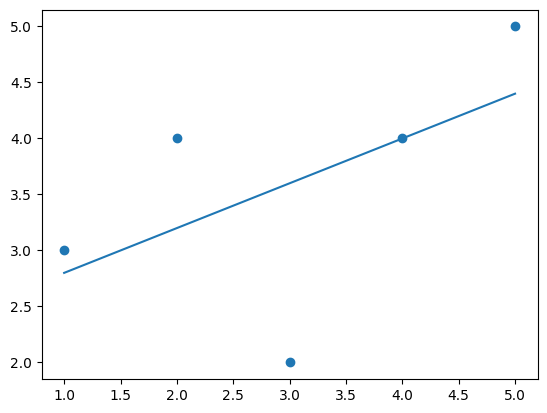

0.5547001962252291


In [ ]:
import matplotlib.pyplot as plt
from scipy import stats
x = [1,2,3,4,5]
y = [3,4,2,4,5]
slope, intercept, r, p, std_err = stats.linregress(x,y)
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()
print(r)

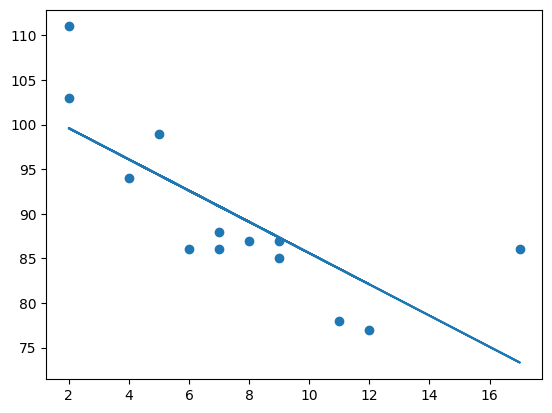

-0.758591524376155


In [ ]:
import matplotlib.pyplot as plt
from scipy import stats
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]
slope, intercept, r, p, std_err = stats.linregress(x,y)
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()
print(r)

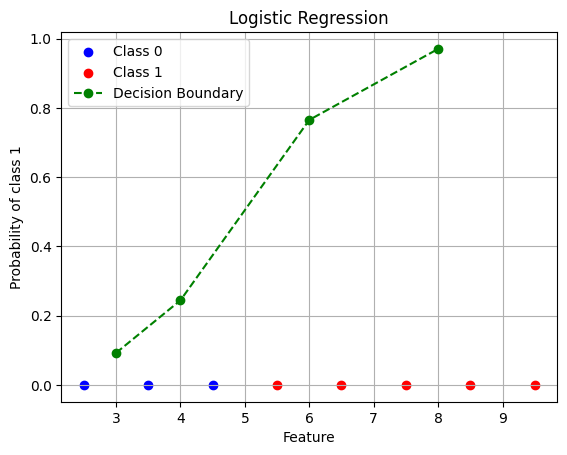

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
x = np.array([[2.5],[3.5],[4.5],[5.5],[6.5],[7.5],[8.5],[9.5]])
y = np.array([0,0,0,1,1,1,1,1])
model = LogisticRegression()
model.fit(x,y)
new_X = np.array([[3.0],[4.0],[6.0],[8.0]])
predicted_probs = model.predict_proba(new_X)[:,1]
plt.scatter(x[y==0],np.zeros_like(x[y==0]),color='blue',label = 'Class 0')
plt.scatter(x[y==1],np.zeros_like(x[y==1]),color='red',label = 'Class 1')
plt.plot(new_X,predicted_probs,color='green',linestyle= '--',marker='o',label = 'Decision Boundary')
plt.xlabel('Feature')
plt.ylabel('Probability of class 1')
plt.title('Logistic Regression')
plt.legend()
plt.grid(True)

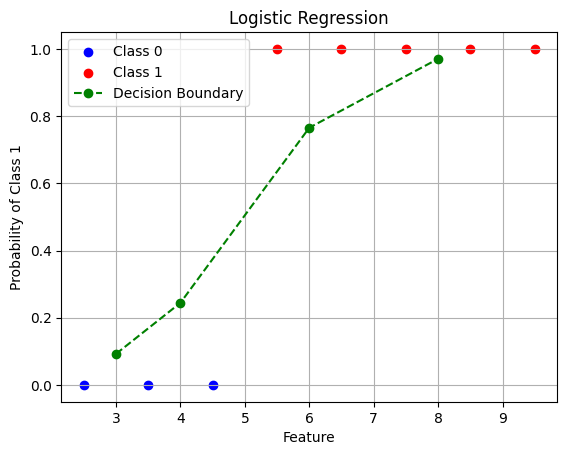

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
X = np.array([29,15,33,28,39])
y = np.array ([0, 0, 1, 1, 1])
model = LogisticRegression()
model.fit(X, y)
new_X= np.array([[3.0], [4.0], [6.0], [8.0]])
predicted_probs = model.predict_proba (new_X) [:, 1]
plt.scatter(X[y == 0], np.zeros_like (X[y == 0]), color='blue', label='Class 0')
plt.scatter(X[y == 1], np.ones_like (X[y == 1]), color='red', label='Class 1')
plt.plot(new_X, predicted_probs, color='green', linestyle='--', marker='o', label='Decision Boundary')
plt.xlabel('Feature')
plt.ylabel('Probability of Class 1')
plt.title('Logistic Regression')
plt.legend()
plt.grid(True)

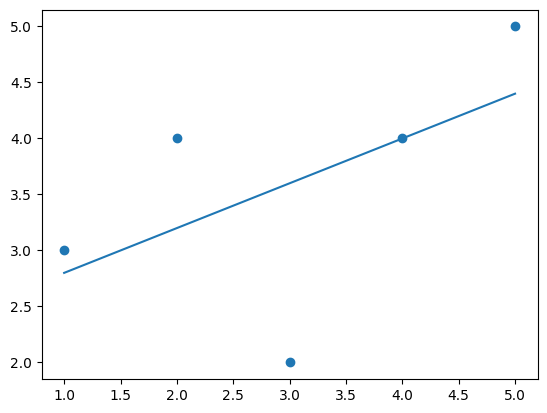

R-squared value for dataset 1: 0.5547001962252291


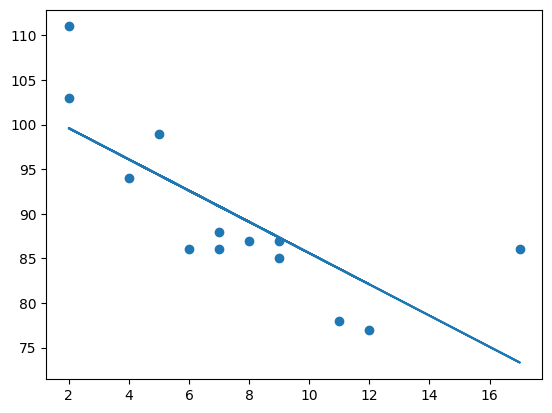

R-squared value for dataset 2: -0.758591524376155


In [ ]:
# prompt: linear regression

import pandas as pd
import numpy as np
import math
import csv
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LogisticRegression

# ... (rest of your existing code) ...

# Example usage of linear regression with different datasets
x = [1, 2, 3, 4, 5]
y = [3, 4, 2, 4, 5]

# Calculate linear regression
slope, intercept, r, p, std_err = stats.linregress(x, y)

# Define a function to predict y values based on the linear regression model
def myfunc(x):
  return slope * x + intercept

# Predict y values using the model
mymodel = list(map(myfunc, x))

# Plot the data points and the linear regression line
plt.scatter(x, y)  # Plot the original data points as a scatter plot
plt.plot(x, mymodel)  # Plot the regression line
plt.show()

# Print the R-squared value (a measure of how well the line fits the data)
print("R-squared value for dataset 1:", r)


x = [5, 7, 8, 7, 2, 17, 2, 9, 4, 11, 12, 9, 6]
y = [99, 86, 87, 88, 111, 86, 103, 87, 94, 78, 77, 85, 86]

# Calculate linear regression for the second dataset
slope, intercept, r, p, std_err = stats.linregress(x, y)

# Define a function to predict y values based on the linear regression model
def myfunc(x):
  return slope * x + intercept


# Predict y values for the second dataset
mymodel = list(map(myfunc, x))

# Plot the data points and the regression line for the second dataset
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

# Print the R-squared value for the second dataset
print("R-squared value for dataset 2:", r)


# ... (rest of your existing code) ...

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 📌 Step 1: Create Sample Data (with Duplicates)
data = pd.DataFrame({
    'Feature1': [1, 2, 3, 4, 5, 5, 6, 7, 8, 9, 9],  # Duplicate values: 5, 9
    'Feature2': [10, 20, 30, 40, 50, 50, 60, 70, 80, 90, 90],  # Duplicate values: 50, 90
    'Target': [2, 4, 6, 8, 10, 10, 12, 14, 16, 18, 18]  # Duplicate values: 10, 18
})

print("\n📌 Original Data (With Duplicates):\n", data)

# 📌 Step 2: Remove Duplicates
data = data.drop_duplicates()
print("\n✅ Data After Removing Duplicates:\n", data)

# 📌 Step 3: Split Data into Features (X) and Target (y)
X = data[['Feature1', 'Feature2']]
y = data['Target']

# 📌 Step 4: Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Step 5: Train a Simple Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# 📌 Step 6: Predict and Calculate Error (Bias & Variance)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate Bias (Training Error)
bias = mean_squared_error(y_train, y_train_pred)
print(f"\n📌 Bias (Training MSE): {bias:.2f}")

# Calculate Variance (Testing Error)
variance = mean_squared_error(y_test, y_test_pred)
print(f"📌 Variance (Testing MSE): {variance:.2f}")

# 📌 Step 7: Perform K-Fold Cross Validation (k=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

print(f"\n📌 Cross Validation Scores (MSE): {-cv_scores}")
print(f"✅ Average CV MSE: {-np.mean(cv_scores):.2f}")


📌 Original Data (With Duplicates):
     Feature1  Feature2  Target
0          1        10       2
1          2        20       4
2          3        30       6
3          4        40       8
4          5        50      10
5          5        50      10
6          6        60      12
7          7        70      14
8          8        80      16
9          9        90      18
10         9        90      18

✅ Data After Removing Duplicates:
    Feature1  Feature2  Target
0         1        10       2
1         2        20       4
2         3        30       6
3         4        40       8
4         5        50      10
6         6        60      12
7         7        70      14
8         8        80      16
9         9        90      18

📌 Bias (Training MSE): 0.00
📌 Variance (Testing MSE): 0.00

📌 Cross Validation Scores (MSE): [2.87934230e-29 9.86076132e-30 1.57772181e-30 1.57772181e-30
 3.15544362e-30]
✅ Average CV MSE: 0.00


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np

# Load dataset
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Initialize k-NN with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions
predictions = knn.predict(X_test)

# Print Correct and Wrong Predictions
correct = []
wrong = []

for i in range(len(y_test)):
    if predictions[i] == y_test[i]:
        correct.append((X_test[i], y_test[i], predictions[i]))  # (Feature Values, Actual, Predicted)
    else:
        wrong.append((X_test[i], y_test[i], predictions[i]))

# Display Results
print("\n✅ Correct Predictions:")
for feat, actual, pred in correct:
    print(f"Features: {feat} | Actual: {actual} | Predicted: {pred}")

print("\n❌ Wrong Predictions:")
for feat, actual, pred in wrong:
    print(f"Features: {feat} | Actual: {actual} | Predicted: {pred}")

# Print overall accuracy
accuracy = knn.score(X_test, y_test)
print(f"\nModel Accuracy: {accuracy:.2f}")


✅ Correct Predictions:
Features: [6.1 2.8 4.7 1.2] | Actual: 1 | Predicted: 1
Features: [5.7 3.8 1.7 0.3] | Actual: 0 | Predicted: 0
Features: [7.7 2.6 6.9 2.3] | Actual: 2 | Predicted: 2
Features: [6.  2.9 4.5 1.5] | Actual: 1 | Predicted: 1
Features: [6.8 2.8 4.8 1.4] | Actual: 1 | Predicted: 1
Features: [5.4 3.4 1.5 0.4] | Actual: 0 | Predicted: 0
Features: [5.6 2.9 3.6 1.3] | Actual: 1 | Predicted: 1
Features: [6.9 3.1 5.1 2.3] | Actual: 2 | Predicted: 2
Features: [6.2 2.2 4.5 1.5] | Actual: 1 | Predicted: 1
Features: [5.8 2.7 3.9 1.2] | Actual: 1 | Predicted: 1
Features: [6.5 3.2 5.1 2. ] | Actual: 2 | Predicted: 2
Features: [4.8 3.  1.4 0.1] | Actual: 0 | Predicted: 0
Features: [5.5 3.5 1.3 0.2] | Actual: 0 | Predicted: 0
Features: [4.9 3.1 1.5 0.1] | Actual: 0 | Predicted: 0
Features: [5.1 3.8 1.5 0.3] | Actual: 0 | Predicted: 0
Features: [6.3 3.3 4.7 1.6] | Actual: 1 | Predicted: 1
Features: [6.5 3.  5.8 2.2] | Actual: 2 | Predicted: 2
Features: [5.6 2.5 3.9 1.1] | Actual: 1 |

In [ ]:
#6 th program
#write a program categorical encoding ,one-hot encoding
import pandas as pd

# Sample data with a categorical column
data = {
    'Color': ['Red', 'Green', 'Blue', 'Red', 'Green']
}

df = pd.DataFrame(data)

# One-hot encoding using pandas
one_hot_encoded = pd.get_dummies(df['Color'], prefix='Color')

# Concatenate the one-hot encoded columns to the original DataFrame
df_encoded = pd.concat([df, one_hot_encoded], axis=1)

# Display the result
print("Original DataFrame:")
print(df)
print("\nOne-Hot Encoded DataFrame:")
print(df_encoded)


Original DataFrame:
   Color
0    Red
1  Green
2   Blue
3    Red
4  Green

One-Hot Encoded DataFrame:
   Color  Color_Blue  Color_Green  Color_Red
0    Red       False        False       True
1  Green       False         True      False
2   Blue        True        False      False
3    Red       False        False       True
4  Green       False         True      False


Model Accuracy: 0.90


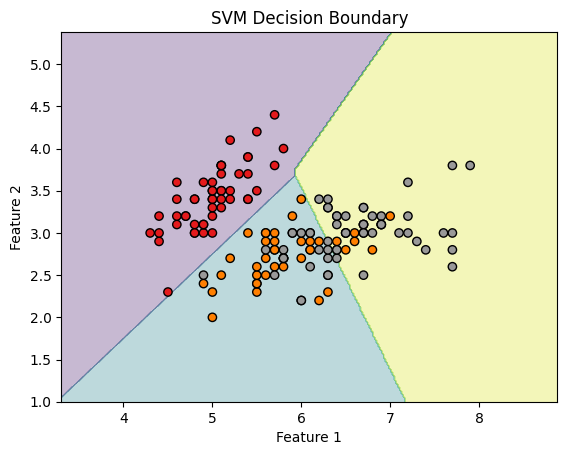

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load a sample dataset (Iris dataset)
iris = datasets.load_iris()
X = iris.data[:, :2]  # Taking only first two features for visualization
y = iris.target

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_model = SVC(kernel='linear')  # Linear kernel
svm_model.fit(X_train, y_train)  # Train the model

# Make predictions
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Plot decision boundary
def plot_decision_boundary(X, y, model):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Set1)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("SVM Decision Boundary")
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X, y, svm_model)

In [ ]:
#helloworld

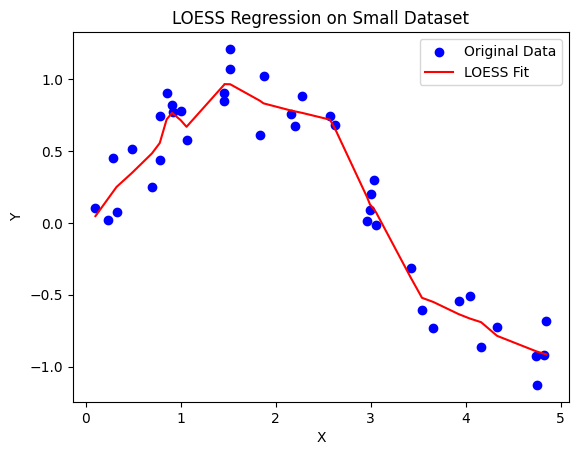

In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Generate a small dataset
np.random.seed(42)
X = np.sort(5 * np.random.rand(40))
Y = np.sin(X) + 0.2 * np.random.randn(40)

# Implement LOESS regression
lowess = sm.nonparametric.lowess
loess_fit = lowess(Y, X, frac=0.2)  # Adjust the frac parameter for smoothing

# Plot the original data and LOESS fit
plt.scatter(X, Y, label='Original Data', color='blue')
plt.plot(loess_fit[:, 0], loess_fit[:, 1], label='LOESS Fit', color='red')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('LOESS Regression on Small Dataset')
plt.show()



Summary statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  

Class distribution:
target
0    50
1    50
2    50


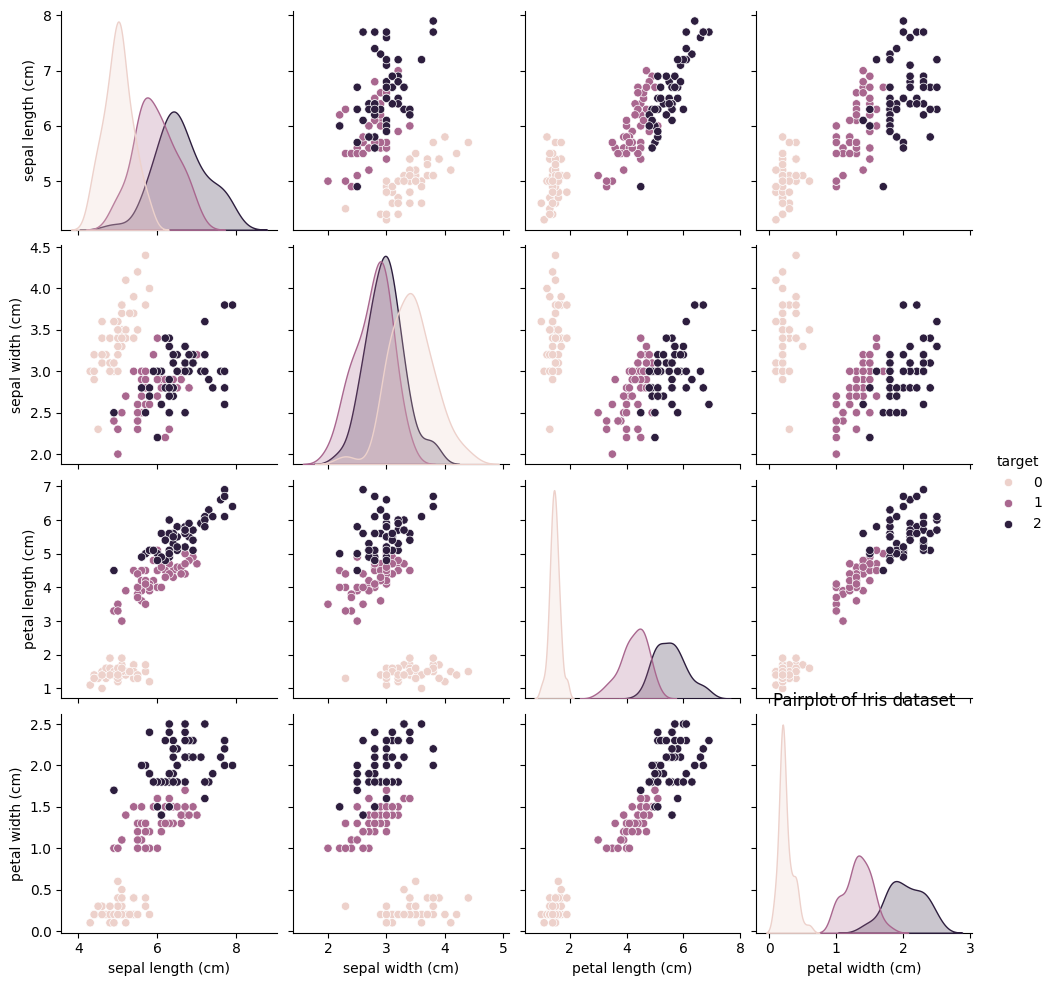

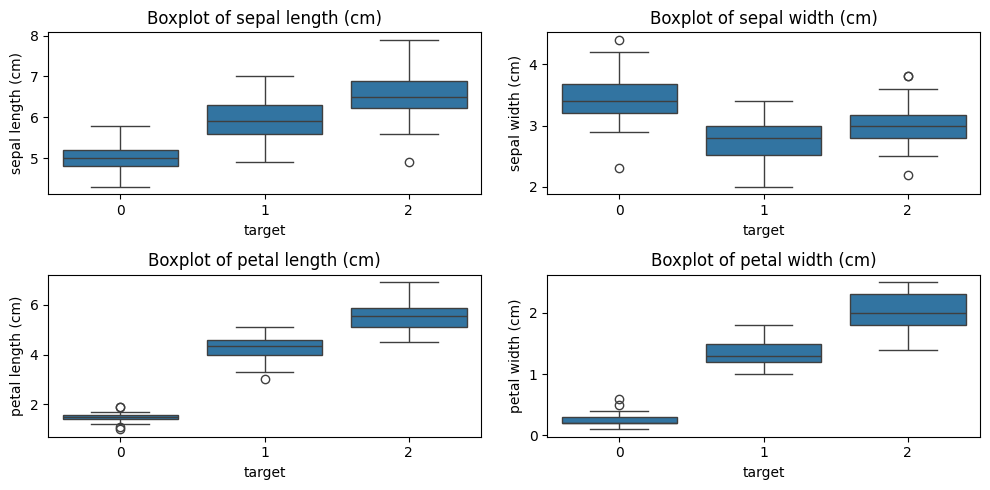

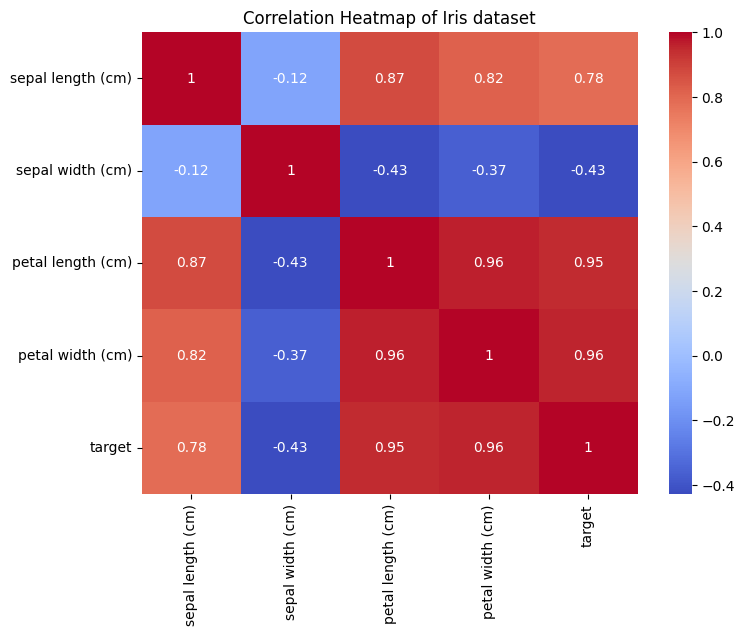

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# Load the iris dataset
iris = datasets.load_iris()

# Create a DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# EDA using Pandas
# Summary statistics
print("Summary statistics:")
print(iris_df.describe())

# Class distribution
print("\nClass distribution:")
print(iris_df['target'].value_counts())

# Pairplot for feature visualization
sns.pairplot(iris_df, hue='target')
plt.title('Pairplot of Iris dataset')
plt.show()

# Boxplot for individual feature visualization
plt.figure(figsize=(10, 5))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='target', y=feature, data=iris_df)
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

# Correlation heatmap
correlation_matrix = iris_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Iris dataset')
plt.show()





KH




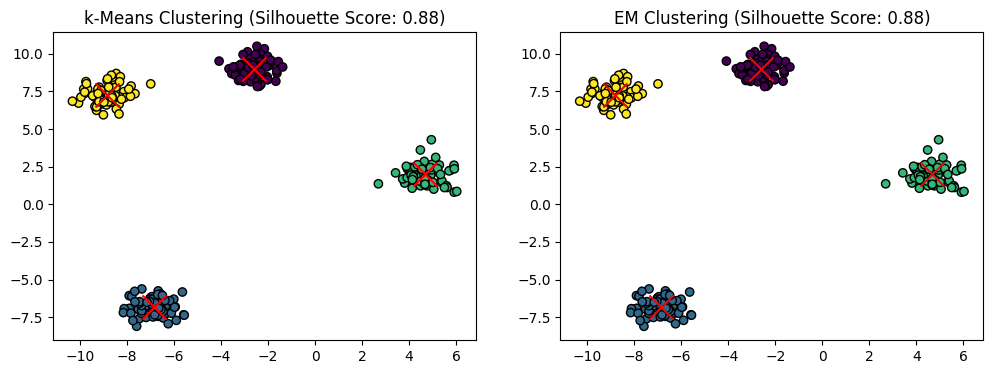

k-Means Silhouette Score: 0.8756469540734731
EM (GMM) Silhouette Score: 0.8756469540734731


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Generate a simple dataset
X, y = datasets.make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Apply k-Means algorithm
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Apply EM algorithm (Gaussian Mixture Model)
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(X)

# Calculate silhouette scores for both algorithms
kmeans_score = silhouette_score(X, kmeans_labels)
gmm_score = silhouette_score(X, gmm_labels)

# Plotting the clusters
plt.figure(figsize=(12, 4))

# Plotting k-Means clusters
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=300, c='red')
plt.title(f'k-Means Clustering (Silhouette Score: {kmeans_score:.2f})')

# Plotting EM clusters
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=gmm_labels, cmap='viridis', edgecolor='k')
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], marker='x', s=300, c='red')
plt.title(f'EM Clustering (Silhouette Score: {gmm_score:.2f})')

plt.show()

print("k-Means Silhouette Score:", kmeans_score)
print("EM (GMM) Silhouette Score:", gmm_score)


In [ ]:
pip --version

pip 24.1.2 from /usr/local/lib/python3.11/dist-packages/pip (python 3.11)


In [ ]:
pip install pgmpy pandas scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 




KH




In [ ]:
import pandas as pd
import numpy as np
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator
from pgmpy.inference import VariableElimination
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Load Heart Disease Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach",
           "exang", "oldpeak", "slope", "ca", "thal", "target"]

df = pd.read_csv(url, names=columns, na_values="?")

# Handle missing values
df.dropna(inplace=True)

# Convert categorical variables to integers
df = df.astype(int)

# Convert target variable (Heart Disease) to binary: 0 (No Disease) and 1 (Disease Present)
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

# Define Bayesian Network structure (Edges represent dependencies)
model = BayesianNetwork([
    ("age", "target"),
    ("sex", "target"),
    ("cp", "target"),
    ("trestbps", "target"),
    ("chol", "target"),
    ("thalach", "target"),
    ("exang", "target")
])

# Train the Bayesian Network using Maximum Likelihood Estimation (MLE)
model.fit(df, estimator=MaximumLikelihoodEstimator)

# Perform inference
infer = VariableElimination(model)

# Test with a sample patient (Example: male, chest pain type 2, cholesterol 250, etc.)
evidence = {"sex": 1, "cp": 2, "chol": 250, "age": 55}
result = infer.query(variables=["target"], evidence=evidence)

print("\nProbability of Heart Disease (0 = No, 1 = Yes):")
print(result)

# Model Evaluation - Splitting Data
X = df.drop(columns=["target"])
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Predict using Bayesian Network
y_pred = []
for _, row in X_test.iterrows():
    evidence = row.to_dict()
    del evidence["target"]
    result = infer.map_query(variables=["target"], evidence=evidence)
    y_pred.append(result["target"])

# Calculate Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

EXP 13: To construct a Bayesian Network for heart disease diagnosis using Python, we will use the pgmpy library, which allows us to build probabilistic graphical models and perform inference.

The Heart Disease Data Set (e.g., UCI Heart Disease dataset) contains risk factors such as age, cholesterol, blood pressure, chest pain type, etc.. We will build a Bayesian Network with these factors to diagnose heart disease

Principal Component Analysis (PCA) is a dimensionality reduction technique used to transform a dataset into a set of linearly uncorrelated variables called principal components

Original Data:
    Feature1  Feature2  Feature3
0       2.5       2.4       3.5
1       0.5       0.7       1.5
2       2.2       2.9       3.1
3       1.9       2.2       2.8
4       3.1       3.0       3.9
PCA Transformed Data:
         PC1       PC2
0  0.802440 -0.324591
1 -3.131320 -0.100332
2  0.661336  0.513623
3 -0.235149  0.105067
4  1.902694 -0.193766
Explained Variance Ratio: [0.97079872 0.02852125]


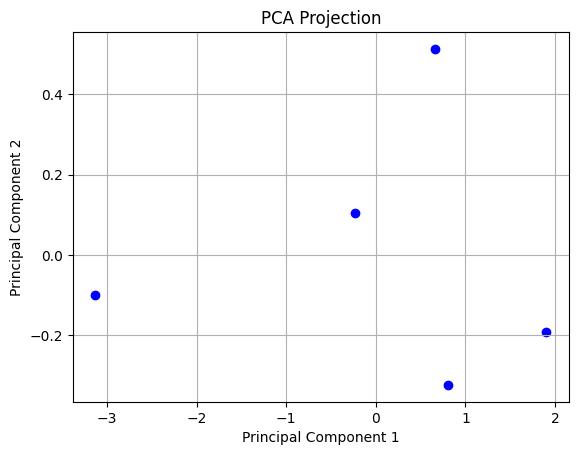

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
data = np.array([
    [2.5, 2.4, 3.5],
    [0.5, 0.7, 1.5],
    [2.2, 2.9, 3.1],
    [1.9, 2.2, 2.8],
    [3.1, 3.0, 3.9]
])

df = pd.DataFrame(data, columns=['Feature1', 'Feature2', 'Feature3'])
print("Original Data:\n", df)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)
pca = PCA(n_components=2)  # Reduce to 2 principal components
principal_components = pca.fit_transform(data_scaled)

# Convert to DataFrame
df_pca = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
print("PCA Transformed Data:\n", df_pca)
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)
plt.scatter(df_pca['PC1'], df_pca['PC2'], c='blue', marker='o')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection')
plt.grid()
plt.show()

In [ ]:
import numpy as np
import math
import csv

def read_data(filename):
    """Reads CSV data and returns metadata (column names) and training data as a NumPy array."""
    with open(filename, 'r') as csvfile:
        datareader = csv.reader(csvfile, delimiter=',')
        headers = next(datareader)
        traindata = np.array(list(datareader))  # Directly convert to NumPy array

    return headers, traindata

class Node:
    """Represents a node in the decision tree."""
    def __init__(self, attribute):
        self.attribute = attribute
        self.children = []
        self.answer = ""

    def __str__(self):
        return self.attribute

def subtables(data, col, delete):
    """Splits data based on unique values of a given column and optionally removes the column."""
    items, counts = np.unique(data[:, col], return_counts=True)
    dict_subtables = {item: data[data[:, col] == item] for item in items}

    if delete:
        dict_subtables = {item: np.delete(table, col, axis=1) for item, table in dict_subtables.items()}

    return items, dict_subtables

def entropy(S):
    """Computes entropy of a given column."""
    _, counts = np.unique(S, return_counts=True)
    probs = counts / len(S)
    return -np.sum(probs * np.log2(probs)) if len(probs) > 1 else 0

def gain_ratio(data, col):
    """Computes the gain ratio for a given column."""
    items, dict_subtables = subtables(data, col, delete=False)
    total_size = len(data)

    entropies = np.array([len(subset) / total_size * entropy(subset[:, -1]) for subset in dict_subtables.values()])
    intrinsic = np.array([(len(subset) / total_size) * math.log2(len(subset) / total_size) for subset in dict_subtables.values()])

    total_entropy = entropy(data[:, -1])
    iv = -np.sum(intrinsic)

    return (total_entropy - np.sum(entropies)) / iv if iv != 0 else 0

def create_node(data, metadata):
    """Recursively builds the decision tree."""
    unique_labels = np.unique(data[:, -1])
    if len(unique_labels) == 1:
        node = Node("")
        node.answer = unique_labels[0]
        return node

    gains = np.array([gain_ratio(data, col) for col in range(data.shape[1] - 1)])
    split = np.argmax(gains)

    node = Node(metadata[split])
    metadata = np.delete(metadata, split, axis=0)

    items, dict_subtables = subtables(data, split, delete=True)
    node.children = [(item, create_node(subtable, metadata)) for item, subtable in dict_subtables.items()]

    return node

def print_tree(node, level=0):
    """Prints the decision tree in a structured format."""
    indent = "   " * level
    if node.answer:
        print(indent, node.answer)
    else:
        print(indent, node.attribute)
        for value, child in node.children:
            print(indent + "   ", value)
            print_tree(child, level + 2)

# Load and process data
metadata, traindata = read_data("/content/Book1.csv")
data = np.array(traindata)

# Build and print decision tree
node = create_node(data, metadata)
print_tree(node)


 Age
    mid
       Competition
          no
             Up
          yes
             Down
    new
       Up
    old
       Down
